In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from kneed import KneeLocator
import sklearn.cluster as cluster

In [2]:
df = pd.read_csv("mall customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df=df.drop('CustomerID',axis=1)

In [5]:
df=df.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})

In [6]:
df.Gender=preprocessing.LabelEncoder().fit_transform(df.Gender)
df.head()

,Gender,Age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


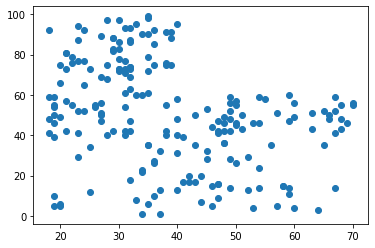

In [7]:
plt.scatter(df['Age'], df['score'])

# KMeans Default cluster

In [8]:
k_mens_clus=cluster.KMeans()

In [9]:
predic_1=k_mens_clus.fit_predict(df[['Gender','Age','income','score']])

In [10]:
df['predic_cluster']=predic_1

In [11]:
vel_cl=df.predic_cluster.unique()

In [12]:
np.sort(vel_cl)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [13]:
df.head()

,Gender,Age,income,score,predic_cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


In [14]:
k_mens_clus.predict([[1,19,15,39]]) # predict cluster

array([4])

# KMeans tune cluster

In [15]:
tune_clus=[]
range_clus=range(1,15)

for k in range_clus:
    k_clus=cluster.KMeans(n_clusters=k)
    k_clus.fit(df[['Gender','Age','income','score']])
    tune_clus.append(k_clus.inertia_)

tune_clus

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75427.71182424152,
 58348.64136331505,
 51181.51147382028,
 44357.62150983519,
 40674.154550504885,
 37206.03706430445,
 34865.972677588776,
 31575.080233709643,
 30054.73878333942,
 27721.54485473677]

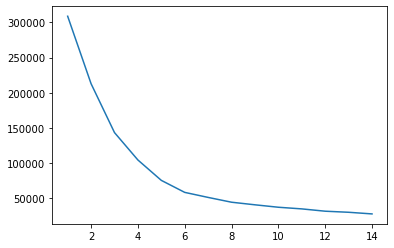

In [16]:
plt.plot(range_clus , tune_clus)

In [17]:
auto_clus = KneeLocator(range_clus , tune_clus, curve='convex', direction = 'decreasing' )

In [18]:
auto_clus.knee

5

# after tune cluster

In [19]:
df=df.drop('predic_cluster',axis=1)

In [20]:
k_mens_clus1=cluster.KMeans(auto_clus.knee)

In [21]:
new_predic=k_mens_clus1.fit_predict(df[['Gender','Age','income','score']])

In [22]:
df['new_scor']=new_predic

In [49]:
df.head()

,Gender,Age,income,score,new_scor
0,1,19,15,39,2
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,3
4,0,31,17,40,2


In [24]:
k_mens_clus1.predict([[1,21,15,6]])

array([2])

In [25]:
center=k_mens_clus1.cluster_centers_
center

array([[ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

# Visualization

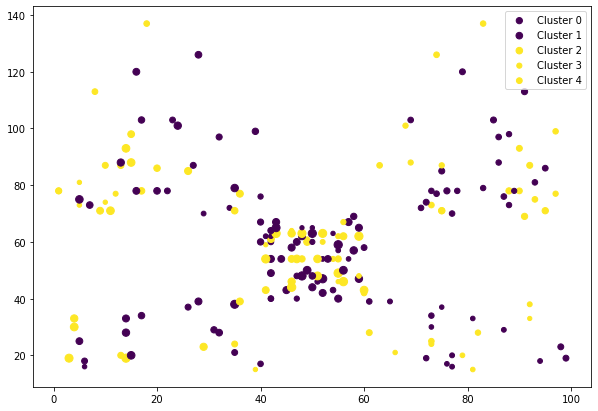

In [65]:
df1 = df[df.new_scor == 0]
df2 = df[df.new_scor == 1]
df3 = df[df.new_scor == 2]
df4 = df[df.new_scor == 3]
df5 = df[df.new_scor == 4]

plt.figure(figsize=(10,7))

plt.scatter(df1['score'], df1['income'],df1['Age'],df1['Gender'], color=None, label='Cluster 0')
plt.scatter(df2['score'], df2['income'],df2['Age'],df2['Gender'], color=None, label='Cluster 1')
plt.scatter(df3['score'], df3['income'],df3['Age'],df3['Gender'], color=None, label='Cluster 2')
plt.scatter(df4['score'], df4['income'],df4['Age'],df4['Gender'], color=None, label='Cluster 3')
plt.scatter(df5['score'], df5['income'],df5['Age'],df5['Gender'], color=None, label='Cluster 4')


plt.legend()